In [7]:
!pip install pdfplumber pandas
from google.colab import files
uploaded=files.upload()
import pdfplumber
import re
import pandas as pd

Saving resume-sample.pdf to resume-sample (1).pdf


In [10]:
#--------extract-----
def extract_text_from_pdf(file_path):
  text=""
  try:
    with pdfplumber.open(file_path)as pdf:
      for i,page in enumerate(pdf.pages):
        page_text=page.extract_text()
        if page_text:
          text+=page_text+"\n"
  except Exception as e:
    print('error while reading file:',e)
  return text

# replace with the actual uploaded filename
resume_path=list(uploaded.keys())[0]
resume_text=extract_text_from_pdf(resume_path)

# extract email and phone
email=re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+",resume_text)
phone=re.findall(r'\b[6-9]\d{9}\b',resume_text)

# extract skills
skills_list=['Python','sql','ml','stastic','excel','power bi','aws']
found_skills=[skill for skill in skills_list if skill.lower()in resume_text.lower()]

# result in dataframe
data={
    "Email":[",".join(email)if email else"Not Found"],
    "phone":[",".join(phone)if phone else"Not Found"],
    "skills":[",".join(found_skills)if found_skills else"Not Found"],
    "Text preview":[resume_text[:300]+"...."if resume_text else"no text extracted"]
}

df=pd.DataFrame(data)
df

,Email,phone,skills,Text preview
0,"careerservices@bellevue.edu.,imasample1@xxx.co...",Not Found,"sql,ml,excel",RESUME SAMPLES\nPreparing an effective resume ...


In [11]:
!pip install pdfplumber pandas
! pip install pytesseract
! pip install pdf2image

In [12]:
import pdfplumber
import pytesseract
from pdf2image import convert_from_path
import re
import pandas as pd
from google.colab import files
uploaded=files.upload()






def extract_text_from_pdf(file_path):
  text=""
  try:
    with pdfplumber.open(file_path)as pdf:
      for page in pdf.pages:
        page_text=page.extract_text()
        if page_text:
          text+=page_text+ "\n"
  except Exception as e:
      print(f"Error extracting text from {file_path}: {e}")
      pass


  if not text.strip():
    try:
      images=convert_from_path(file_path)
      for img in images:
        text+=pytesseract.image_to_string(img)+"\n"
    except Exception as e:
      print(f"Error during OCR for {file_path}: {e}")

  return text

def extract_name(text):
  lines=text.split("\n")
  for line in lines[:3]:
    if len(line.split())<=4 and line.strip():
      return line.strip()
  return "Not found"

skills_list=['python','ml','sql','power bi','excel','stastic','aws','adobe illustrator','photoshop','health & safety','food prepartion','nutrition']


jd_text=input("paste job descrption here:")

jd_skills=[skill.lower() for skill in skills_list if re.search(r'\b'+ skill +r'\b',jd_text,re.IGNORECASE)]
print("\n Extracted JD Skills:",jd_skills)

all_resumes=[]

for file_name in uploaded.keys():
  resume_text=extract_text_from_pdf(file_name)

  name=extract_name(resume_text)
  email=re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+",resume_text)
  phone=re.findall(r'\b[6-9]\d{9}\b',resume_text)
  found_skills=[skill for skill in skills_list if re.search(r'\b'+skill+r'\b',resume_text,re.IGNORECASE)]

  if jd_skills:
    score=(len(set([s.lower() for s in found_skills])& set (jd_skills))/len(jd_skills))*100
  else:
    score=0

  all_resumes.append({
      "file name": file_name,
      "name":name,
      "Email":",".join(email) if email else"Not Found",
      "phone":",".join(phone) if phone else "Not Found",
      "Skills":",".join(found_skills) if found_skills else "Not Found",
      "ATS Score(%)": round(score,2),
      "Text preview":resume_text[:300]+"....." if resume_text else "No Text Extracted"
  })


df=pd.DataFrame(all_resumes)


if  df.empty:
  print("no resumes parsed.please upload valid pdf resumes.")
else:
  display(df.sort_values(by="ATS Score(%)",ascending=False))
  df.to_csv("resumes_ranked.csv",index=False)

  print("\n csv created succesfully as 'resume_ranked.csv' ")


  files.download("resumes_ranked.csv")

Saving Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy.pdf to Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy.pdf
Saving Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy.pdf to Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy.pdf
Saving Amsterdam-Modern-Resume-Template.pdf to Amsterdam-Modern-Resume-Template.pdf
Saving London-Resume-Template-Professional - Copy.pdf to London-Resume-Template-Professional - Copy.pdf
Saving London-Resume-Template-Professional.pdf to London-Resume-Template-Professional.pdf
Saving Moscow-Creative-Resume-Template - Copy.pdf to Moscow-Creative-Resume-Template - Copy.pdf
Saving Moscow-Creative-Resume-Template.pdf to Moscow-Creative-Resume-Template.pdf
Saving New-York-Resume-Template-Creative - Copy.pdf to New-York-Resume-Template-Creative - Copy.pdf
Saving New-York-Resume-Template-Creative.pdf to New-York-Resume-Template-Creative.pdf
paste job descrption here:i am looking for food 

,file name,name,Email,phone,Skills,ATS Score(%),Text preview
0,Amsterdam-Modern-Resume-Template - Copy - Copy...,JULIE MONROE,email@email.com,Not Found,nutrition,20.0,JULIE MONROE\nNUTRITION CONSULTANT\nDETAILS PR...
1,Amsterdam-Modern-Resume-Template - Copy - Copy...,JULIE MONROE,email@email.com,Not Found,nutrition,20.0,JULIE MONROE\nNUTRITION CONSULTANT\nDETAILS PR...
2,Amsterdam-Modern-Resume-Template.pdf,JULIE MONROE,email@email.com,Not Found,nutrition,20.0,JULIE MONROE\nNUTRITION CONSULTANT\nDETAILS PR...
3,London-Resume-Template-Professional - Copy.pdf,"Mandy Campbell, Bootcamp Instructor",email@email.com,Not Found,"health & safety,nutrition",20.0,"Mandy Campbell, Bootcamp Instructor\n1515 Paci..."
4,London-Resume-Template-Professional.pdf,"Mandy Campbell, Bootcamp Instructor",email@email.com,Not Found,"health & safety,nutrition",20.0,"Mandy Campbell, Bootcamp Instructor\n1515 Paci..."
5,Moscow-Creative-Resume-Template - Copy.pdf,(541) 754-3010 · email@email.com,email@email.com,Not Found,"adobe illustrator,photoshop",20.0,"1515 Pacific Ave, Los Angeles, CA 90291, Unite..."
6,Moscow-Creative-Resume-Template.pdf,(541) 754-3010 · email@email.com,email@email.com,Not Found,"adobe illustrator,photoshop",20.0,"1515 Pacific Ave, Los Angeles, CA 90291, Unite..."
7,New-York-Resume-Template-Creative - Copy.pdf,ROBERT COOPER,email@email.com,Not Found,Not Found,0.0,"ROBERT COOPER\nSECURITY GUARD LOS ANGELES, CA ..."
8,New-York-Resume-Template-Creative.pdf,ROBERT COOPER,email@email.com,Not Found,Not Found,0.0,"ROBERT COOPER\nSECURITY GUARD LOS ANGELES, CA ..."



 csv created succesfully as 'resume_ranked.csv' 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

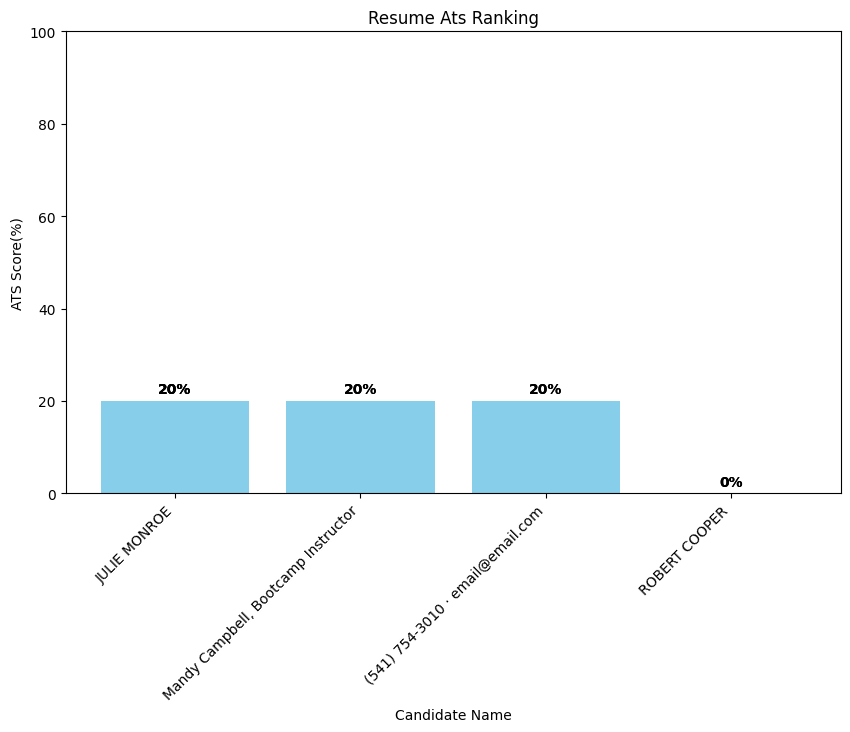

In [13]:
import matplotlib.pyplot as plt

df_sorted=df.sort_values(by="ATS Score(%)",ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(df_sorted["name"],df_sorted["ATS Score(%)"],color="skyblue")
plt.xlabel("Candidate Name")
plt.ylabel("ATS Score(%)")
plt.title("Resume Ats Ranking")
plt.xticks(rotation=45,ha="right")
plt.ylim(0,100)

for bar in bars:
  height=bar.get_height()
  plt.text(
      bar.get_x()+bar.get_width()/2,
      height+1,
      f"{height:.0f}%",
      ha="center",va="bottom",fontsize=10,fontweight="bold"
  )

plt.show()

In [20]:
from google.colab import files

# Upload one or more resumes
uploaded = files.upload()


Saving Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy.pdf to Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy (1).pdf
Saving Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy.pdf to Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy (1).pdf
Saving Amsterdam-Modern-Resume-Template.pdf to Amsterdam-Modern-Resume-Template (1).pdf
Saving London-Resume-Template-Professional - Copy.pdf to London-Resume-Template-Professional - Copy (1).pdf
Saving London-Resume-Template-Professional.pdf to London-Resume-Template-Professional (1).pdf
Saving Moscow-Creative-Resume-Template - Copy.pdf to Moscow-Creative-Resume-Template - Copy (1).pdf
Saving Moscow-Creative-Resume-Template.pdf to Moscow-Creative-Resume-Template (1).pdf
Saving New-York-Resume-Template-Creative - Copy.pdf to New-York-Resume-Template-Creative - Copy (1).pdf
Saving New-York-Resume-Template-Creative.pdf to New-York-Resume-Template-Creative (1).pdf


In [24]:
import os
resumes = [f for f in os.listdir() if f.lower().endswith(".pdf")]
print("Resumes to process:", resumes)


Resumes to process: ['New-York-Resume-Template-Creative (1).pdf', 'Moscow-Creative-Resume-Template - Copy.pdf', 'London-Resume-Template-Professional - Copy (1).pdf', 'Moscow-Creative-Resume-Template - Copy (1).pdf', 'Amsterdam-Modern-Resume-Template.pdf', 'London-Resume-Template-Professional - Copy.pdf', 'Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy.pdf', 'New-York-Resume-Template-Creative - Copy.pdf', 'London-Resume-Template-Professional (1).pdf', 'Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy.pdf', 'Moscow-Creative-Resume-Template.pdf', 'New-York-Resume-Template-Creative - Copy (1).pdf', 'Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy - Copy (1).pdf', 'Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy (1).pdf', 'Amsterdam-Modern-Resume-Template (1).pdf', 'New-York-Resume-Template-Creative.pdf', 'Moscow-Creative-Resume-Template (1).pdf', 'London-Resume-Template-Professional.pdf']


In [29]:
# =========================
# 1️⃣ Install Dependencies
# =========================
!pip install pdfplumber openpyxl xlsxwriter

import pdfplumber
import re
import pandas as pd
from google.colab import files
import os

# =========================
# 2️⃣ Upload Resumes
# =========================
uploaded = files.upload()
resumes = [f for f in uploaded.keys() if f.lower().endswith(".pdf")]
print("📂 Resumes detected:", resumes)

# =========================
# 3️⃣ Extract Text Function
# =========================
def extract_text_from_pdf(file_path):
    text = ""
    try:
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
    except Exception as e:
        print("❌ Error while reading file:", e)
    return text

# =========================
# 4️⃣ Input Job Description
# =========================
print("📌 Paste Job Description below (example):\n")
job_description = """
We are looking for a food prepration,health& safety,investigation skills,nutrition,illustrator,adobe photoshop.
"""
print(job_description)

# Extract JD keywords
jd_keywords = [word.strip().lower() for word in job_description.replace(",", "").split() if len(word) > 2]
print("\n🔑 JD Keywords Extracted:", jd_keywords)

# =========================
# 5️⃣ Parse Resumes & Calculate ATS Score
# =========================
data = []

for file in resumes:
    print(f"🔎 Processing {file}...")
    text = extract_text_from_pdf(file)
    resume_text = text.lower()

    # Extract Email
    email = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+", text)
    email = email[0] if email else "Not Found"

    # Match Resume Skills vs JD Keywords
    matched_keywords = [kw for kw in jd_keywords if kw in resume_text]
    if not matched_keywords:
        matched_keywords = ["Not Found"]

    # ATS Score
    score = 0 if "Not Found" in matched_keywords else round((len(matched_keywords)/len(jd_keywords))*100,2)

    # Shorten filename
    short_name = os.path.splitext(file)[0][:30]

    data.append({
        "Candidate Name": short_name,
        "Email": email,
        "Matched Keywords": ", ".join(matched_keywords),
        "ATS Score": score
    })

# Convert to DataFrame & sort
df = pd.DataFrame(data).sort_values(by="ATS Score", ascending=False)
print("\n✅ Extracted Resume Data (Ranked by ATS Score):")
print(df)

# =========================
# 6️⃣ Export Excel with Charts & Dashboard
# =========================
excel_file = "ATS_Results_Dashboard.xlsx"
with pd.ExcelWriter(excel_file, engine="xlsxwriter") as writer:
    # --- ATS Ranking Sheet ---
    df.to_excel(writer, sheet_name="ATS Ranking", index=False)
    workbook = writer.book
    worksheet = writer.sheets["ATS Ranking"]

    # Horizontal Bar Chart
    chart = workbook.add_chart({"type": "bar"})
    chart.add_series({
        "name": "ATS Score",
        "categories": ["ATS Ranking", 1, 0, len(df), 0],
        "values": ["ATS Ranking", 1, 3, len(df), 3],
    })
    chart.set_title({"name": "ATS Ranking"})
    chart.set_x_axis({"name": "ATS Score (%)"})
    chart.set_y_axis({"name": "Candidates"})
    worksheet.insert_chart("F2", chart)

    # --- JD Keyword Distribution Sheet ---
    all_keywords = []
    for s in df["Matched Keywords"]:
        all_keywords.extend(s.split(", "))
    keywords_count = pd.Series(all_keywords).value_counts()
    keywords_df = keywords_count.reset_index()
    keywords_df.columns = ["Keyword", "Count"]
    keywords_df.to_excel(writer, sheet_name="Keyword Distribution", index=False)

    worksheet2 = writer.sheets["Keyword Distribution"]
    chart2 = workbook.add_chart({"type": "pie"})
    chart2.add_series({
        "name": "JD Keyword Distribution",
        "categories": ["Keyword Distribution", 1, 0, len(keywords_df), 0],
        "values": ["Keyword Distribution", 1, 1, len(keywords_df), 1],
    })
    chart2.set_title({"name": "JD Keyword Distribution"})
    worksheet2.insert_chart("D2", chart2)

    # --- Dashboard Sheet ---
    dashboard = workbook.add_worksheet("Dashboard")

    # Top 5 candidates table
    top_n = 5
    dashboard.write(0, 0, "Top Candidates by ATS Score")
    dashboard.write_row(1, 0, df.columns.tolist())
    for i, row in enumerate(df.head(top_n).values.tolist()):
        dashboard.write_row(i+2, 0, row)

    # Highlight top candidate row in green
    highlight_format = workbook.add_format({'bg_color': '#C6EFCE', 'font_color': '#006100'})
    dashboard.set_row(2, cell_format=highlight_format)  # row index 2 = first candidate

    # Create new ATS Bar Chart for Dashboard
    dashboard_chart = workbook.add_chart({"type": "bar"})
    dashboard_chart.add_series({
        "name": "ATS Score",
        "categories": ["ATS Ranking", 1, 0, len(df), 0],
        "values": ["ATS Ranking", 1, 3, len(df), 3],
    })
    dashboard_chart.set_title({"name": "ATS Ranking"})
    dashboard_chart.set_x_axis({"name": "ATS Score (%)"})
    dashboard_chart.set_y_axis({"name": "Candidates"})
    dashboard.insert_chart("F2", dashboard_chart)

    # Create new Pie Chart for Dashboard
    dashboard_pie = workbook.add_chart({"type": "pie"})
    dashboard_pie.add_series({
        "name": "JD Keyword Distribution",
        "categories": ["Keyword Distribution", 1, 0, len(keywords_df), 0],
        "values": ["Keyword Distribution", 1, 1, len(keywords_df), 1],
    })
    dashboard_pie.set_title({"name": "JD Keyword Distribution"})
    dashboard.insert_chart("F20", dashboard_pie)

print(f"\n📊 Excel file saved: {excel_file}")

# =========================
# 7️⃣ Download Excel
# =========================
files.download(excel_file)


Saving Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy.pdf to Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy (6).pdf
Saving Amsterdam-Modern-Resume-Template.pdf to Amsterdam-Modern-Resume-Template (5).pdf
Saving London-Resume-Template-Professional - Copy.pdf to London-Resume-Template-Professional - Copy (5).pdf
Saving Moscow-Creative-Resume-Template.pdf to Moscow-Creative-Resume-Template (5).pdf
Saving New-York-Resume-Template-Creative - Copy.pdf to New-York-Resume-Template-Creative - Copy (5).pdf
📂 Resumes detected: ['Amsterdam-Modern-Resume-Template - Copy - Copy - Copy (2) - Copy (6).pdf', 'Amsterdam-Modern-Resume-Template (5).pdf', 'London-Resume-Template-Professional - Copy (5).pdf', 'Moscow-Creative-Resume-Template (5).pdf', 'New-York-Resume-Template-Creative - Copy (5).pdf']
📌 Paste Job Description below (example):


We are looking for a food prepration,health& safety,investigation skills,nutrition,illustrator,adobe photoshop.


🔑 JD Keywords E

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>